# papermill 라이브러리를 활용한 보고서 자동생성
---

반복적으로 수집되는 데이터의 분석보고서를 만드는 일은 효율적인 측면에서 반드시 자동화되어야 할 것이다. <br><br>하지만 자동화 시스템을 구축하는데는 비용이 수반한다. 대기업이나 자체 데이터웨어하우스가 구축이되어있는 기업에 반해 <br><br>비IT중소기업 또는 비주기적으로 다른 데이터를 통해 분석보고서를 생성해야될 조직에게 자동화 시스템을 구축하는 것은 여의치않은 실정이다.<br><br> 프로그래밍을 통한 자동화는 분명 효율적이나 일정수준이상의 인력과 자금이 투입되기에는 무리가 있는 분들에게 papermill 라이브러리는<br><br> 소규모조직에서도 충분히 효율적인 워크플로우를 구축할 수 있다는 가능성을 보여준다. 

---

# 1. 보고서 자동생성

<br>
파이썬은 자유로운 데이터 핸들링과 다양한 분석,시각화 라이브러리로 의미있는 분석결과를 가져올 수 있는 최적의 도구이다.<br><br>하지만 만약 당신의 동료들이 아니 당신의 조직에서 이처럼 효율적이고 팬시한 보고서생성을 하기를 원한다면 어떻게 해야할까?<br><br>
모든 보고서를 당신이 copy&paste 하여 만들어주는 것은 비효율적이며, 지속되기도 어렵다. <br><br>이러한 상황에서 우리는 파이썬 papermill 라이브러리를 통해 수집하는 데이터를 변수화하여 보고서생성을 자동화할 필요가 있다.

<br>

### (1) csv파일로부터 쥬피터 노트북파일을 생성하기

2017년 상장시장의 현황분석보고서작성을 위해 final2017.csv파일로부터 하는 jupyter notebook생성을 해보자.

In [9]:
import pandas as pd

filename ="C:/DATA/final2017.csv"
data = pd.read_csv("C:/DATA/final2017.csv")

year = filename[-8:-4]

data.head()

,Unnamed: 0,회사명,시장구분,업종명,결산기준일,자산총계,부채총계,자본총계,당기순이익,매출액,영업이익
0,1560,AJ네트웍스,유가증권시장상장법인,산업용 기계 및 장비 임대업,2017년 12월 31일 일요일,2.354234e+12,1907060853223,4.471729e+11,20647179903,1431015800850,7.722159e+10
1,1561,AJ렌터카,유가증권시장상장법인,운송장비 임대업,2017년 12월 31일 일요일,1.216525e+12,970241901690,2.462830e+11,12271400812,636765265938,4.088738e+10
2,1562,AK홀딩스,유가증권시장상장법인,기타 금융업,2017년 12월 31일 일요일,2.944784e+12,1792720288489,1.152064e+12,185414017343,3392454610505,2.656413e+11
3,1563,BGF,유가증권시장상장법인,종합 소매업,2017년 12월 31일 일요일,8.581186e+11,132887657573,7.252309e+11,3497875341046,123842619339,1.044774e+10
4,1564,BGF리테일,유가증권시장상장법인,종합 소매업,2017년 12월 31일 일요일,1.277350e+12,888705326553,3.886442e+11,27983934658,938735224712,2.651648e+10


<br><br>
## 상장시장 분포

In [10]:

market = pd.crosstab(index=data["시장구분"], 
                              columns="count",colnames =['']) 

market


,count
시장구분,
유가증권시장상장법인,578
코스닥시장상장법인,912


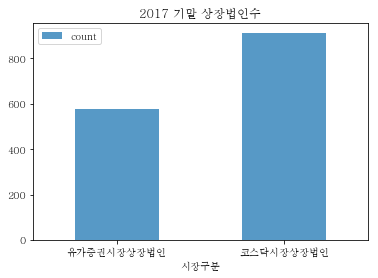

In [14]:
#한글폰트설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\H2MJSM.TTF").get_name()
rc('font', family=font_name)


from matplotlib import pyplot as plt
market.plot(kind = 'bar' , alpha =0.75,rot=0,title=f'{year} 기말 상장법인수')
plt.show()

<br><br>
## 업종별 분포

In [15]:
sectors = pd.crosstab(index=data["업종명"],columns="count") 
sectors_order = sectors.sort_values(ascending = False,by='count')
sectors_order['rank'] = sectors_order.rank(ascending = False,method='dense').astype('int')
sectors_order

col_0,count,rank
업종명,,
전자부품 제조업,94,1
기타 금융업,90,2
특수 목적용 기계 제조업,90,2
자동차 신품 부품 제조업,73,3
소프트웨어 개발 및 공급업,72,4
통신 및 방송 장비 제조업,61,5
의약품 제조업,49,6
기타 화학제품 제조업,47,7
반도체 제조업,38,8


In [292]:
df = sectors_order[sectors_order['rank'] < 11].sort_values(ascending = False,by='count')
df

col_0,count,rank
업종명,,
전자부품 제조업,94,1
기타 금융업,90,2
특수 목적용 기계 제조업,90,2
자동차 신품 부품 제조업,73,3
소프트웨어 개발 및 공급업,72,4
통신 및 방송 장비 제조업,61,5
의약품 제조업,49,6
기타 화학제품 제조업,47,7
반도체 제조업,38,8


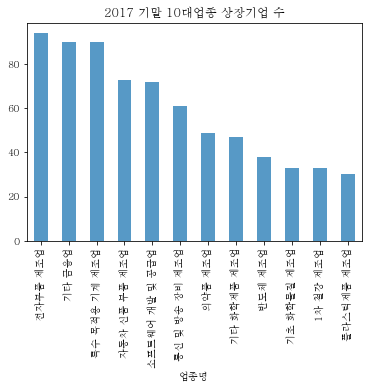

In [294]:
df['count'].plot(kind = 'bar' , alpha =0.75,rot=90,title=f'{year} 기말 10대업종 상장기업 수')


plt.show()

<br><br>

## 상장시장별 업종 분포

In [295]:
# sectors = pd.crosstab(index=data[["시장구분","업종명"]],columns="count") 

df1 = pd.crosstab(data['업종명'],data['시장구분'],margins=True)
df1.tail()

시장구분,유가증권시장상장법인,코스닥시장상장법인,All
업종명,,,
"해체, 선별 및 원료 재생업",0,1,1
화학섬유 제조업,5,2,7
환경 정화 및 복원업,0,1,1
회사 본부 및 경영 컨설팅 서비스업,9,2,11
All,578,912,1490


In [296]:
sector = df1.sort_values(ascending = False,by='All')[1:12][["유가증권시장상장법인","코스닥시장상장법인"]]
sector


시장구분,유가증권시장상장법인,코스닥시장상장법인
업종명,,
전자부품 제조업,17,77
특수 목적용 기계 제조업,12,78
기타 금융업,57,33
자동차 신품 부품 제조업,34,39
소프트웨어 개발 및 공급업,3,69
통신 및 방송 장비 제조업,3,58
의약품 제조업,26,23
기타 화학제품 제조업,20,27
반도체 제조업,8,30


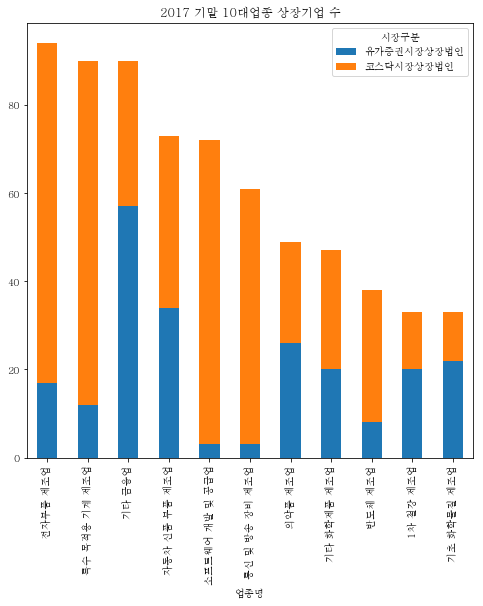

In [297]:
sector.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True,
                 title= f"{year} 기말 10대업종 상장기업 수")


<br><br>

### (2) 쥬피터 노트북파일을 Html 보고서로 변환하기

동료와 보고서를 공유하기에 Html파일형식이 더 유용할 것이므로 Html을 사용하기로 한다.
<br>

주피터 노트북파일(.ipynb)를 .Html 로 변환하기 위해 **"nbconvert"** 툴을 사용할 것이다.
<br><br>
*nbconvert : jupyter notebook파일(ipynb)을 다른 형태(PDF, HTML, LaTex, Reveal.js HTML slideshow, Markdown 등)으로 변환시키주는 툴*
https://nbconvert.readthedocs.io/en/latest/

* 설치

>pip install nbconvert

<br>

* 사용

아나콘다 커맨드창을 열어 다음과 같이 Html파일변환을 할 수 있다. <br><br>
테스트삼아 ipynb파일을 변환시키는 과정을 진행해본다.

>jupyter nbconvert PATH/final2018.ipynb
<br>

*PAHT/ 는 final2018 파일의 디렉터리 경로이다.*

<br><br>

### (3) papermill을 사용하여 Html보고서 자동생성하기

papermill은 jupyter notebook을 파라미터화하여 실행시켜주는 유용한 툴이다.<br>
https://papermill.readthedocs.io/en/latest/

* 설치<br>

>pip install papermill<br>

https://papermill.readthedocs.io/en/latest/installation.html

<br>

* 사용


> perameterization (변수화)

앞서 템플릿(.ipynb)파일에서 수집되는 데이터를 변수화시킨다.<br><br>

변수화시키는 방법은 간단하다. <br><br>

jupytet notebook 상단에 위치한 View를 통해  Cell Toolbar - Tags 를 클릭한다.




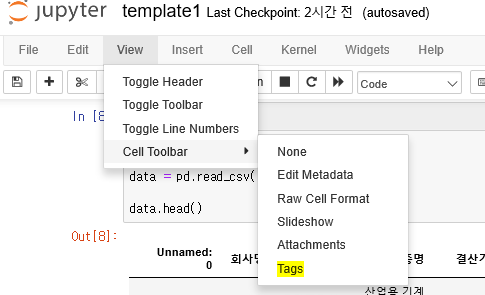

In [277]:
from IPython.display import Image
Image('C:/jupyter_project/git_office/Python Data Science/image/papermill_use.png')

Tags 를 클릭하면 Cell 오른쪽 상단에 add tag 기능이 생긴다. 

우리는 수집되는 데이터를 변수화하기 위해 filename을 변수로 설정하는 Cell에 parameters tag를 추가한다.

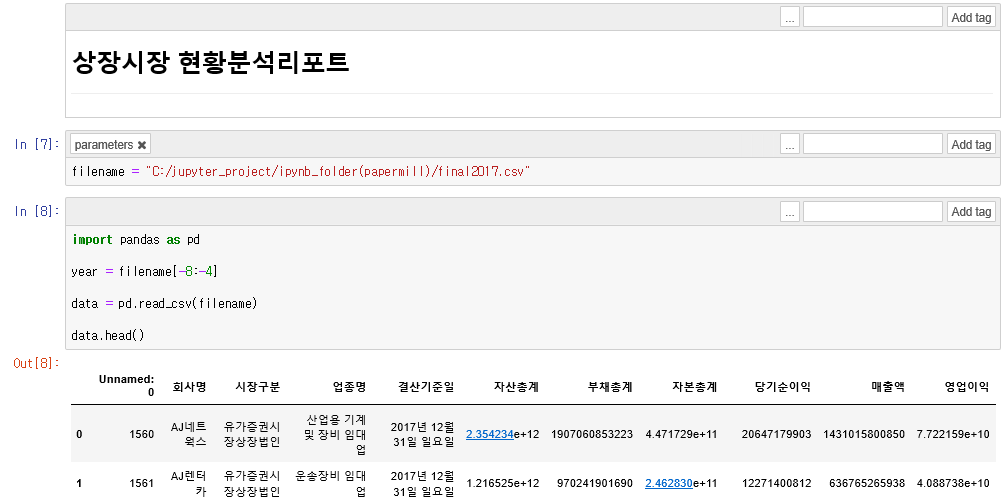

In [283]:
from IPython.display import Image
Image('C:/jupyter_project/git_office/Python Data Science/image/papermill_temp.png')

parameters tag를 가지는 Cell은 새로 수집된 데이터가 주어질 때 또 다른 파이썬스크립트로부터 이 노트북을 실행하도록 해준다.

<br>
같은 디렉터리에 다음과 같은 파일들이 위치되어 있는지 확인한다.

├── final2018.csv<br>
├── final2017.csv<br>
└── template1.ipynb

<br><br>
이제  다른 준비가 끝났으니  새로 수집된 데이터( final2018 )로부터 보고서를 생성해보자.<br>
보고서 생성을 자동화하는 만큼 생성 스크립트는 매우 간단하다.<br>
<br>
papermill 라이브러리를 임포트한다음 execute_notebook함수를 사용하여 보고서를 새로 생성한다.

In [ ]:
import papermill as pm

template1_path = 'C:/DATA/template1.ipynb'       # 템플릿 파일이 저장되어 있는 경로
final2018_ipynb_path = 'C:/DATA/final2018.ipynb' # 새로 생성되는 final2018.ipynb 보고서가 저장될 경로
final2018_csv_path = 'C:/DATA/final2018.csv'     # 새로 수집된 final2018.csv 데이터가 저장되어있는 경로


pm.execute_notebook(
   template1_path,
   final2018_ipynb_path,
   parameters=dict(filename=final2018_csv_path)
)


위의 코드를 실행시키면 final2018.ipynb파일이 새로 생성된 것을 확인할 수 있을 것이다.

├── final2018.ipynb <- This one! <br>
├── final2018.csv<br>
├── final2017.csv<br>
└── template1.ipynb

<br>

생성된 final2018.ipynb 를 실행해보면 parameters Cell 위치에 새로 수집된 데이터로 변수설정되어 있는 것을 확인할 수 있다.

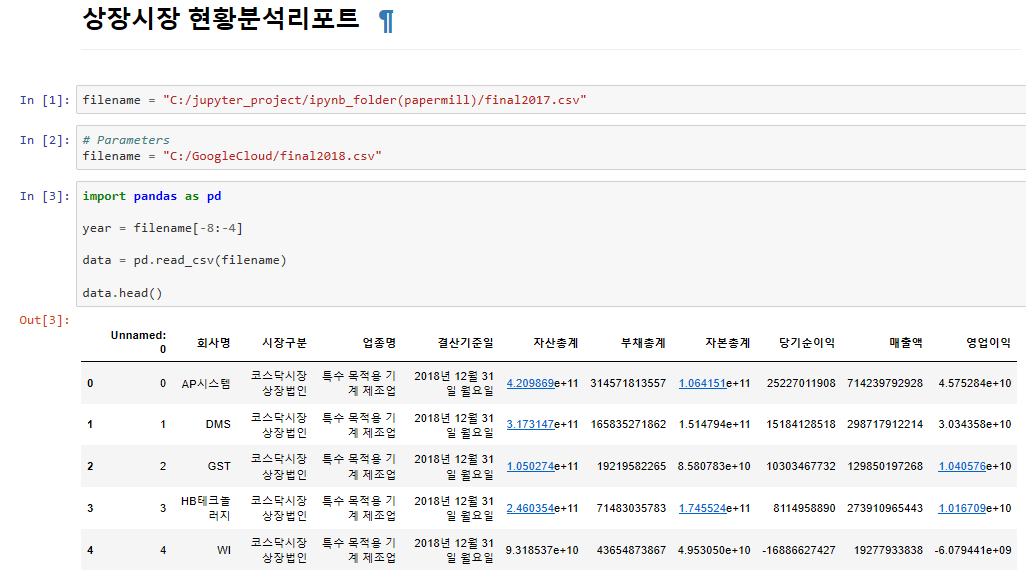

In [282]:
from IPython.display import Image
Image('C:/jupyter_project/git_office/Python Data Science/image/papermill_new.png')

보고서 내용도 마찬가지로 final2018.csv 파일로부터 다른 아웃풋을 출력한다.

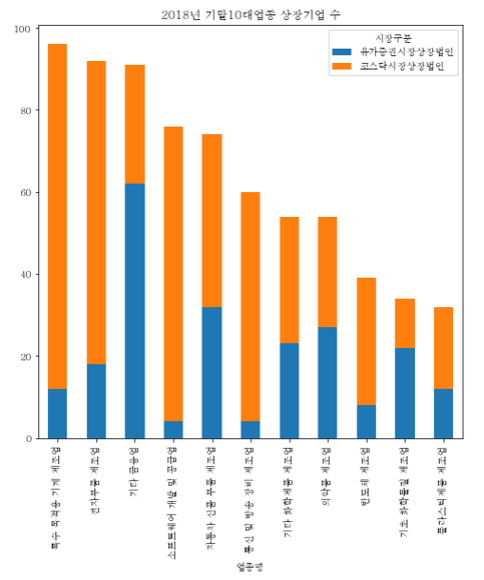

In [281]:
from IPython.display import Image
Image('C:/jupyter_project/git_office/Python Data Science/image/papermill_new1.png')

이처럼 우리는 papermill의 pm.execute_notebook함수를 통해 손쉽게 새로운 보고서를 생성할 수 있게 되었다. <br><br><br><br>
지금부터는 이 기능의 장점을 극대화하기위해 클라우드와 연동하여 보고서 생성 프로세스 자체를 자동화시키는 시스템을 구축해보도록 하자.

<br><br>

# 2. 보고서 생성 프로세스 자동화

<br>

만약 당신이 분석 보고서의 생성양식을 공유하여 동료가 수집한 데이터에 이를 적용시키길 원한다면 <br><br>클라우드 폴더(구글드라이브,원드라이브,드롭박스 등..)를 사용하여 손쉽게 데이터의 분석 결과를 공유할 수 있다.<br><br>

클라우드 폴더는 기업이나 개인이 어려움없이 이용할 수 있는 플랫폼이기 때문에 <br><br>클라우드 폴더를 활용하여 새로 생성된 보고서를 공유하는 워크플로우를 살펴볼 것이다.

<br>

전체 워크플로우를 그림으로 요약하면 다음과 같다.

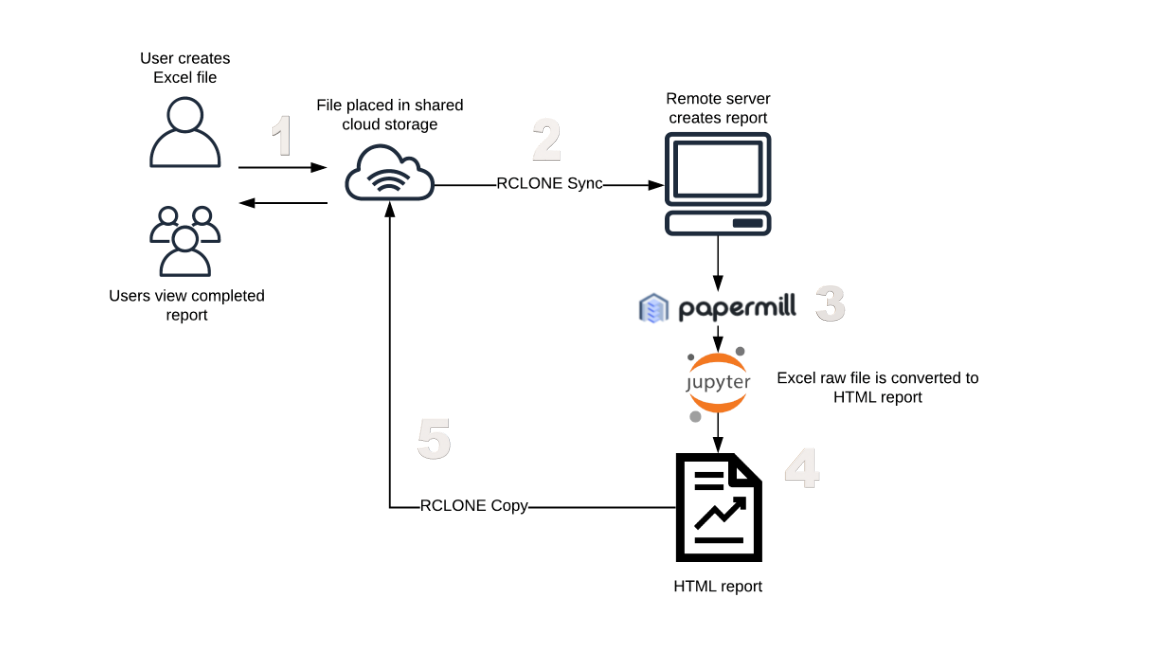

In [3]:
from IPython.display import Image
Image('C:/jupyter_project/git_office/Python Data Science/image/papermill_workflow.png')

#### 5단계의 과정을 거치면서 워크플로우가 완성된다.<br><br>

1. 동료들이 수집한 데이터를 공유된 클라우드 폴더에 업로드한다.<br><br>
2. 원격서버와 클라우드 폴더를 동기화하는 과정에서 새로 업로드된 데이터를 감지하고 데이터를 원격서버로 내려받는다.(Rclone 사용)<br><br>
3. 원격서버의 파이썬 스크립트가 실행이 되고 쥬피터 노트북 보고서를 생성한다. (papermill 사용)<br><br>
4. ipynb파일을 공유하기 쉬운포맷인 Html로 변환을 해준다.(nbconvert 사용)<br><br>
5. 생성된 Html 파일을 다시 클라우드 폴더에 업로드해준다. 그리고 마침내 동료들과 보고서를 공유할 수 있게 된다. (Rclone 사용)<br><br>

<br>

### (1) Rclone

워크플로우 두번째와 다섯번째에서 사용하는 Rclone이 무엇인지 궁금할 것이다. <br><br>
사실 Rclone이야말로 워크플로우를 가능하게하는 핵심 개념이다.

Rclone은 파일과 폴더를 동기화시켜주는 커맨드 라인 프로그램이다.<br><br>
간단히 말해서 지금 우리가 하려는 것처럼 클라우드 폴더와 원격서버간에 파일을 주고 받을 수 있게 해주는 프로그램으로 이해하면 될 것이다.<br><br>https://rclone.org/<br><br>

Rclone을 사용하기 위해서는 프로그램을 설치해야한다. <br>
그리고 설치한 이후에서 클라우드 폴더와 원격서버(개인용 컴퓨터)의 configuration을 꼭 해줘야 한다.

<br>

* Rclone 설치

윈도우 환경에있는 사용자들은 https://rclone.org/downloads/ 웹페이지로 들어가 사양에 맞게 Rclone을 설치한다.

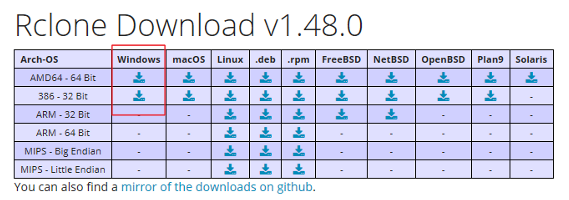

In [7]:
from IPython.display import Image
Image('C:/jupyter_project/git_office/Python Data Science/image/papermill_rclone_install.png')

그리고 rclon 이라는 폴더를 C드라이브에 생성한다음 rclone.exe파일을 위치시킨다.

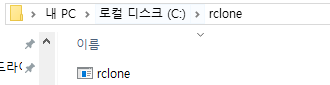

In [8]:
from IPython.display import Image
Image('C:/jupyter_project/git_office/Python Data Science/image/papermill_rclone_install2.png')

이제 설치를 마쳤으니 rclone을 실행하여 클라우드 폴더와 연동하는 작업을 진행해보자.

<br>

* Rclone Configuration

클라우드 폴더와 원격서버(개인용 컴퓨터)의 configuration은 사용하는 클라우드 폴더에 따라 다른 설정이 필요로한다.<br>
우리는 구글 드라이브를 사용하기로 하며 configuration을 진행해보겠다.

*구글 드라이브가 아닌 다른 클라우드를 사용하시는 분은 아래의 링크로 들어가서 계속 진행하면 되겠다.*<br>
https://rclone.org/


먼저 rclone을 실행해보자.<br>
rclone은 앞서 정의에서 언급했듯이 커맨드 라인 프로그램이므로 커맨드라인을 열어 실행을 시킨다.<br>(시작프로그램에서 cmd를 타이핑하여 명령프롬프트창을 실행)

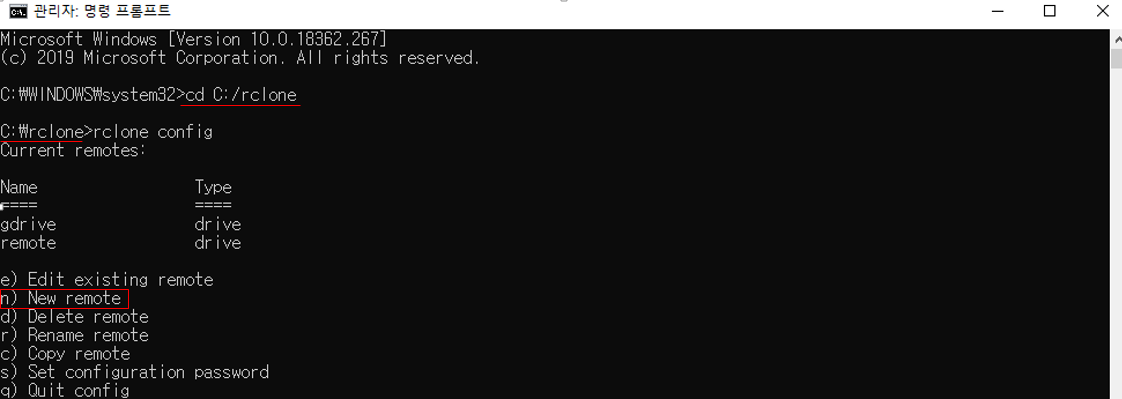

In [19]:
from IPython.display import Image
Image('C:/jupyter_project/git_office/Python Data Science/image/papermill_rclone_config.png')

명령프롬프트창이 열리면 rclon.exe 파일이 있는 경로로 이동해주기 위해 아래와 같이 타이핑한다.

>cd C:/rclone 

그러면 현재 경로가 C:\rclone으로 변경되는 것을 확인할 수 있다. 

>rclone config

rclone config 를 입력하여 현재 생성된 remote 종류와 몇가지 선택사항들이 확인한다. <br>
현재 필자의 경우 이미 2개의 remote를 생성했기때문에 gdrive와 remote라는 remote가 보이지만 처음하는 분들은 아무 것도 보이지 않을 것이다.<br>

새로 생성을 해야하므로 (n)New remote인  n을 입력한다.

<br>

나머지 설정들은 https://rclone.org/drive/ 로 들어가서 아래와 같은 과정을 거치면 되겠다.

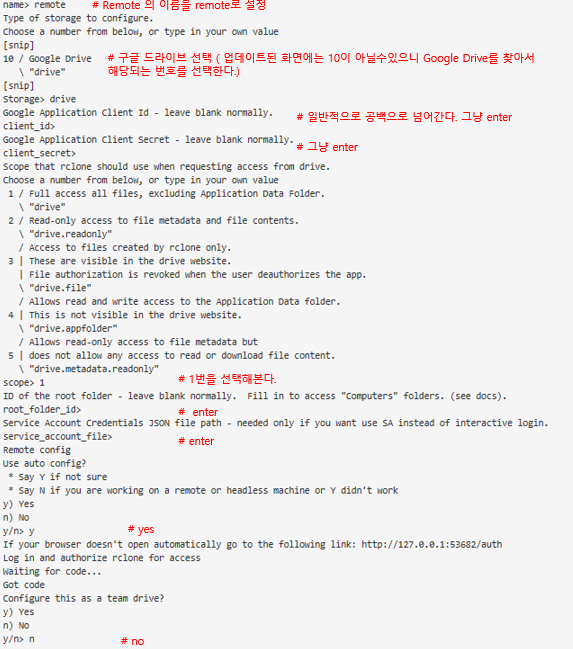

In [17]:
from IPython.display import Image
Image('C:/jupyter_project/git_office/Python Data Science/image/papermill_rclone_config2.png')

<br>
아래와 같이 계정을 로그인하고 권한 허용창이 뜨면 허용을 선택한 후 configuration을 완료한다.

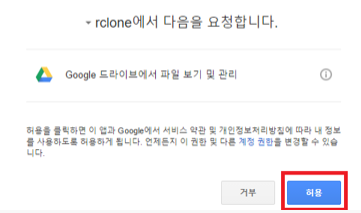

In [16]:
from IPython.display import Image
Image('C:/jupyter_project/git_office/Python Data Science/image/papermill_rclone_config3.png')

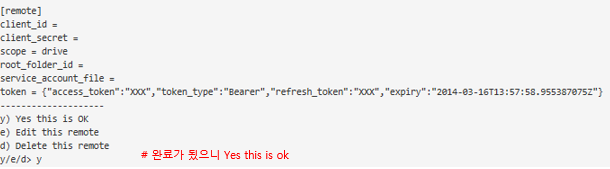

In [18]:
from IPython.display import Image
Image('C:/jupyter_project/git_office/Python Data Science/image/papermill_rclone_config4.png')

<br>

Google Drive와 원격서버(개인 컴퓨터)가 연동이 되었는지 확인하기 전에 권한을 허용한 계정으로 Google Drive 폴더를 하나 생성한다.<br>
(필자는 'csv_files'의 폴더를 하나 생성했다.)

그리고 아래와 같이 rclone 커맨드를 작성하고 해당 폴더가 있는지 확인해보자.<br><br>

\# 드라이브 상위 레벨에 있는 디렉터리 리스트
>rclone lsd remote:  <br>


해당 폴더가 출력이 되면 정상적으로 연결이 된 것이다. 이로써 우리는 원격서버와 Google Drive 폴더에 자유롭게 접근할 수 있게 되었다.<br><br>




<br>

### (2) Subprocess

새로 업로드된 파일을 감지하고 저장 및 로드, 그리고 분석 보고서 생성을 하는 과정을 자동화하기 위해 파이썬 스크립트에서 이 모든것을 실행할 필요가 있다. 

하지만 Rclone은 커맨드 라인 프로그램이기 때문에 별도의 프로그램을 사용하지 않는 이상 명령프롬프트창에서 실행을 해야하는데 다행히도<br>

파이썬에는 파이썬에서 쉘 스크립트를 실행시켜주는 모듈 Subprocess를 제공한다.

원래 프로그래밍을 할때에는 스크립트에서 만들어진 코드를 실행하고 결과를 쉘에 출력시키는 것이 일반적이지만, <br><br>subprocess는 우리의 목적에 맞게 cmd와 같은 쉘에서 실행된 결과물을 거꾸로 스크립트로 가져오는 역할을 한다.

subprocess모듈 중에서 run()함수를 사용하여 Rclone을 실행하기로 한다. 

<br>

### (3) 파이썬 스크립트 작성

앞서 언급한 다섯단계의 워크플로우가 스크립트에서는 어떻게 작동할까?<br>

각각의 기능을 하는 함수를 나열하고 스크립트 실행 과정을 살펴보자.<br><br>

**1. get_new_files() : 클라우드 폴더로부터 새로 업로드된 엑셀파일을 감지 및 리스트 추출**<br><br>

**2. sync_directories() : 클라우드 폴더와 로컬폴더를 동기화시켜 두 폴더간의 파일을 일치시키는 함수 (클라우드폴더는 수정되지않는다.)**<br><br>

**3. run_notebook() : 새로 업로드된 csv파일을 쥬피터파일(ipynb)을 생성**<br><br>

**4. generate_html_report() : 쥬피터파일을 html파일로 변환**<br><br>

**5. push_to_cloud() : html파일을 클라우드폴더로 push하는 함수**

<br>

----

본격적으로 들어가기에 앞서 로컬 디렉터리 2개를 생성하자.<br><br>

* 새로 수집된 csv파일(final2018.csv) 을  저장하는 로컬 디렉터리 <br><br>
"C:/GoogleCloud" <br><br>

* 기본 csv파일(final2017.csv) , 템플릿 쥬피터파일(template1.ipynb) , 새로 생성되는 쥬피터파일 , 새로 생성되는 html파일을 저장하는 로컬 디렉터리<br><br> "C:/jupyter_project/ipynb_folder(papermill)"<br><br><br>

---

<br>

#### 1. get_new_files() : 클라우드 폴더로부터 새로 업로드된 엑셀파일을 감지 및 리스트 추출

<br>

- Google Drive폴더에 있는 csv 파일 리스트 추출

In [ ]:
import subprocess
import sys

remote_folder = 'csv_files'

list_cloud = subprocess.run(
    ["C:/rclone/rclone", "lsf", f"remote:{remote_folder}"],capture_output=True,text=True,
)

cloud_directories =[i for i in list_cloud.stdout.split('\n') if re.search('.csv$',i)]

subprocess.run() 안에있는 "C:/rclone/rclone", "lsf", f"remote:{remote_folder}" 는 rclone 명령어이다.<br><br>
subprocess의 run함수를 통해 rclone에서 실행된 결과를 출력하여 list_cloud 변수에 바인딩할 수 있다.<br><br>

- Google Drive폴더에 있는 csv 파일 리스트 추출

In [ ]:
import subprocess
import sys

local_folder = 'C:/GoogleCloud'

list_local = subprocess.run(
    ["C:/rclone/rclone","lsf", local_folder], capture_output=True, text=True
)

local_directories =[i for i in list_local.stdout.split('\n') if i] 

<br>

- 일치하지 않는 파일 리스트 추출

In [ ]:
list(set(cloud_directories).difference(set(local_directories)))

<br>

- Function

In [ ]:
def get_new_files(remote_folder, local_folder):

    import re
    import subprocess
    import sys 
    
    list_cloud = subprocess.run(
        ["C:/rclone/rclone", "lsf", f"remote:{remote_folder}"],
        capture_output=True,
        text=True
    )
    
    cloud_directories =[i for i in list_cloud.stdout.split('\n') if re.search('.csv$',i)]
    
    

    list_local = subprocess.run(
        ["C:/rclone/rclone","lsf", local_folder], capture_output=True, text=True
    )
    
    local_directories =[i for i in list_local.stdout.split('\n') if i] 
    
    

    new_files = list(set(cloud_directories).difference(set(local_directories)))

    
    
    return new_files 

<br>

#### 2.  sync_directories() : 클라우드 폴더와 로컬폴더를 동기화

<br>

- Google Drive폴더와 로컬폴더를 동기화시킨다. <br><br> Google Drive 폴더를 복사해서 가져오는 것이므로 Google Drive폴더는 변화가 없다.

In [ ]:
import subprocess

local_folder = 'C:/GoogleCloud'

remote_folder = 'csv_files'

subprocess.run(
    ["C:/rclone/rclone", "sync", f"remote:{remote_folder}", local_folder]
)

<br>

- Function

In [ ]:
import subprocess

def sync_directories(remote_folder, local_folder):

    sync = subprocess.run(
        ["C:/rclone/rclone", "sync", f"remote:{remote_folder}", local_folder]
    )

    print("Syncing local directory with cloud....")
    return sync.returncode


<br>

#### 3. run_notebook() : 새로 업로드된 csv파일로부터 쥬피터파일(ipynb)을 생성 및 저장

<br>

- pm.execute_notebook()

<br>

execute_notebook() 함수에 3가지 인수를 받아 함수를 실행한다.

-템플릿 파일경로 (.ipynb)<br>
-로컬에 저장된 새 파일경로 (.csv)<br>
-새로 생성하여 저장할 주피터 파일 경로 (.ipynb)<br><br>


-**템플릿 파일경로 (.ipynb)**<br>

In [ ]:
TEMPLATE_NOTEBOOK = "C:/jupyter_project/ipynb_folder(papermill)/template1.ipynb" 

<br>

-**로컬에 저장된 새 파일경로 (.csv)**<br>





In [ ]:
LOCAL_FOLDER = "C:/GoogleCloud" 
new_files = list(set(cloud_directories).difference(set(local_directories)))


excel_report_path = LOCAL_FOLDER+'/'+ new_files  

<br>

-**새로 생성하여 저장할 주피터 파일 경로 (.ipynb)**

In [ ]:
file_name = new_files.split(".")[0] 

notebook_template = os.path.split(TEMPLATE_NOTEBOOK)[0]


notebook_tamplate_path = notebook_template+'/'+file_name+'.ipynb'

<br>

-**pm.execute_notebook()**

In [ ]:
import papermill as pm

pm.execute_notebook(
    TEMPLATE_NOTEBOOK,
    notebook_tamplate_path,
    parameters=dict(filename=excel_report_path)
)

위의 코드를 실행하면 notebook_tamplate_path 경로에 쥬피터 파일이 저장된 것을 확인할 수 있을 것이다.

<br>

- Function

In [ ]:
def run_notebook(excel_report):

    notebook_template = os.path.split(TEMPLATE_NOTEBOOK)[0] 

    excel_report_path = LOCAL_FOLDER+'/'+ excel_report     


    file_name = excel_report.split(".")[0]         

    notebook_tamplate_path = notebook_template+'/'+file_name+'.ipynb'   


    pm.execute_notebook(
        TEMPLATE_NOTEBOOK,
        notebook_tamplate_path,
        parameters=dict(filename=excel_report_path)
    )


    return notebook_tamplate_path  

<br>

#### 4. generate_html_report() : 쥬피터파일을 html파일로 변환

<br>

- html형식 파일저장


In [ ]:
subprocess.run( ["jupyter", "nbconvert", notebook_tamplate_path, "--to=html"] )

<br>

- html파일 경로 변수생성


In [ ]:
html_path =notebook_tamplate_path.split('.')[0] + '.html'

<br>

- Function

In [ ]:
def generate_html_report(notebook_tamplate_path):

    generate = subprocess.run(
        ["jupyter", "nbconvert", notebook_tamplate_path, "--to=html"]
    )
    print("HTML Report was generated")
    
    html_path =notebook_tamplate_path.split('.')[0] + '.html' 
    
    return html_path 

<br>

#### 5. push_to_cloud() : html파일을 클라우드폴더로 push하는 함수

<br>

- html파일을 클라우드 폴더로 push하기


In [ ]:
remote_folder = 'csv_files'

subprocess.run( ["C:/rclone/rclone", "copy", html_path, f"remote:{remote_folder}"] )

<br>

- Function

In [ ]:
def push_to_cloud(remote_folder, html_path):

    push = subprocess.run(
        ["C:/rclone/rclone", "copy", html_path, f"remote:{remote_folder}"]
    )
    print("Report Published!!!")


<br>

### (4) 파이썬 스크립트 실행

In [27]:
import subprocess
import sys
import os
import papermill as pm
import re



def get_new_files(remote_folder, local_folder):
    """
클라우드 폴더로부터 새로 업로드된 엑셀파일을 감지 및 리스트 추출
    """

    list_cloud = subprocess.run(
        ["C:/rclone/rclone", "lsf", f"remote:{remote_folder}"],
        capture_output=True,
        text=True
    )
    
    cloud_directories =[i for i in list_cloud.stdout.split('\n') if re.search('.csv$',i)]
    
    

    list_local = subprocess.run(
        ["C:/rclone/rclone","lsf", local_folder], capture_output=True, text=True
    )
    
    local_directories =[i for i in list_local.stdout.split('\n') if i] 
    
    


    new_files = list(set(cloud_directories).difference(set(local_directories))) 

    return new_files 






def sync_directories(remote_folder, local_folder):
    """
    클라우드 폴더와 로컬폴더를 동기화시켜 두 폴더간의 파일을 일치시킨다. (클라우드폴더는 수정되지않는다.)
    """
    
    sync = subprocess.run(
        ["C:/rclone/rclone", "sync", f"remote:{remote_folder}", local_folder]
    )

    print("Syncing local directory with cloud....")
    return sync.returncode






def run_notebook(excel_report):
    """
새로 업로드된 csv파일을 쥬피터파일(ipynb)을 생성
    """
    
    notebook_template = os.path.split(TEMPLATE_NOTEBOOK)[0]  


    excel_report_path = LOCAL_FOLDER+'/'+ excel_report      


    file_name = excel_report.split(".")[0]          

    notebook_tamplate_path = notebook_template+'/'+file_name+'.ipynb'   



    pm.execute_notebook(
        TEMPLATE_NOTEBOOK,
        notebook_tamplate_path,
        parameters=dict(filename=excel_report_path)
    )


    return notebook_tamplate_path  

    
    




def generate_html_report(notebook_tamplate_path):
    """
    쥬피터파일을 html파일로 변환
    """

    generate = subprocess.run(
        ["jupyter", "nbconvert", notebook_tamplate_path, "--to=html"]
    )
    print("HTML Report was generated")
    
    html_path =notebook_tamplate_path.split('.')[0] + '.html' 
    
    
    return html_path 





def push_to_cloud(remote_folder, html_path):
    """
    html파일을 클라우드폴더로 push하는 함수.
    """

    push = subprocess.run(
        ["C:/rclone/rclone", "copy", html_path, f"remote:{remote_folder}"]
    )
    print("Report Published!!!")

    
    
    
    
REMOTE_FOLDER = "csv_files" 
LOCAL_FOLDER = "C:/GoogleCloud" 
TEMPLATE_NOTEBOOK = "C:/jupyter_project/ipynb_folder(papermill)/template1.ipynb" 





new_files = get_new_files( remote_folder=REMOTE_FOLDER, local_folder=LOCAL_FOLDER ) 


if len(new_files) == 0:
    
    print("Everything is synced. No new files.")
    sys.exit()
    
else:
    
    for new_file in new_files: # csv파일리스트를 순서대로 동기화 연동


        print("There are files missing.")
        print(new_file)

    
        sync_directories(remote_folder=REMOTE_FOLDER, local_folder=LOCAL_FOLDER)    


        notebook_path = run_notebook(new_file)


        html_path = generate_html_report(notebook_path)


        push_to_cloud(html_path = html_path, remote_folder=REMOTE_FOLDER)


        print("Updater finished.")

<br><br>
정상적으로 실행이 된다면 출력은 다음과 같을 것이다.

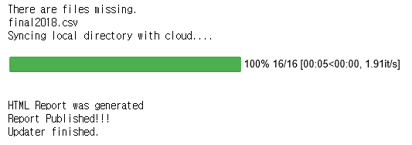

In [39]:
from IPython.display import Image
Image('C:/jupyter_project/git_office/Python Data Science/image/papermill_auto_output.png')

<br><br><br>

<br>

### (5) 파일저장 및 생성과정

초기 Google Drive와 디렉터리는 아래와 같다면,

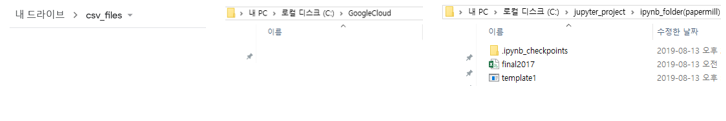

In [34]:
from IPython.display import Image
Image('C:/jupyter_project/git_office/Python Data Science/image/papermill_auto_dir.png')

<br><br><br>
당신의 동료 중 한명이 Google Drive 폴더에 새 파일을 업로드할 때 파이썬 코드실행으로 벌어지는 일은 다음과 같다.<br><br>

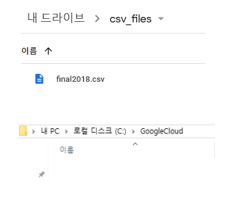

In [35]:
from IPython.display import Image
Image('C:/jupyter_project/git_office/Python Data Science/image/papermill_auto_dir1.png')

Google Drive 폴더 파일리스트 와 로컬 디렉터리 파일의 불일치를 감지한 후

<br>

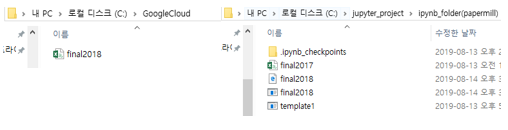

In [37]:

from IPython.display import Image
Image('C:/jupyter_project/git_office/Python Data Science/image/papermill_auto_dir2.png')

새 파일을 GoogleCloud 로컬폴더로 저장시키고, <br><br>
쥬피터 노트북 파일을 생성한 후 ipynb_folder(papermill)폴더에 저장,<br><br>
쥬피터 노트북 파일을 변환한 Html파일 생성한다.<br><br>

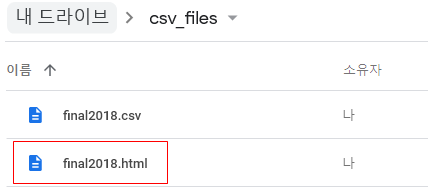

In [38]:
from IPython.display import Image
Image('C:/jupyter_project/git_office/Python Data Science/image/papermill_auto_dir3.png')

그리고 마침내 동료들과 공유할 수 있는 Html 보고서파일이 Google Drive에 다시 업로드된다.